In [2]:
import sys
sys.path.append("./src/")
import lumberjack
import tree_reader


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
iris_counts = np.loadtxt("./iris/iris.trunc")
print(iris_counts.shape)

(150, 4)


In [5]:
random_mask = np.random.random(150) < .1
print(np.sum(random_mask))

iris_train = iris_counts[np.logical_not(random_mask)]
iris_test = iris_counts[random_mask]

16


In [6]:
forest = lumberjack.fit(iris_train,trees=100,dispersion_mode="ssme",norm="l2",in_feature_subsample="2",out_feature_subsample="2",depth="10",leaves="5")

Setting context
Input:(134, 4)
Output:(134, 4)
CHECK TRUTH
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpjgjm7gev
['input.counts', 'output.counts', 'tmp.i.header', 'tmp.o.header']
Generating trees
Running /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1
Command: /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1 generate -ic /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpjgjm7gev/input.counts -oc /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpjgjm7gev/output.counts -o /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpjgjm7gev/tmp -auto -ifh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpjgjm7gev/tmp.i.header -ofh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpjgjm7gev/tmp.o.header -trees 100 -dispersion_mode ssme -norm l2 -in_feature_subsample 2 -out_feature_subsample 2 -depth 10 -leaves 5
Trying to readline

5.1 0
100
134,4

5.1 0
100
134,4
Automatic parameters:
ss:88
if:4
of:4
p:8
t:

In [6]:
print(str(type(forest)))
print(str(forest.features))
print(str(forest.samples))
leaves = forest.leaves()
print(leaves[1].samples)

<class 'tree_reader.Forest'>
['0' '1' '2' '3']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138']
['34', '35', '39']


[[0.44565217391304346, [[0.5853658536585366, [[0.25, [[0.5, []], [0.5, []]]], [0.75, [[0.5555555555555556, [[0.5, []], [0.5, []]]], [0.4444444444444444, [[0.375, []], [0.625, []]]]]]]], [0.4146341463414634, [[0.7647058823529411, [[0.5384615384615384, [[0.42857142857142855, []], [0.5714285714285714, []]]], [0.46153846153846156, [[0.5, []], [0.5, []]]]]], [0.23529411764705882, []]]]]], [0.5543478260869565, [[0.5882352941176471, [[0.4, [[0.6666666666666666, [[0.5, []], [0.5, []]]], [0.3333333333333333, []]]], [0.6, [[0.5555555555555556, [[0.6, [[0.5, []], [0.5, []]]], [0.4, []]]], [0.4444444444444444, [[0.625, []], [0.375, []]]]]]]], [0.4117647058823529, [[0.7142857142857143, [[0.4, [[0.5, []], [0.5, []]]], [0.6, [[0.3333333333333333, []], [0.6666666666666666, [[0.5, []], [0.5, []]]]]]]], [0.2857142857142857, [[0.5, []], [0.5, []]]]]]]]]


/Users/boris/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


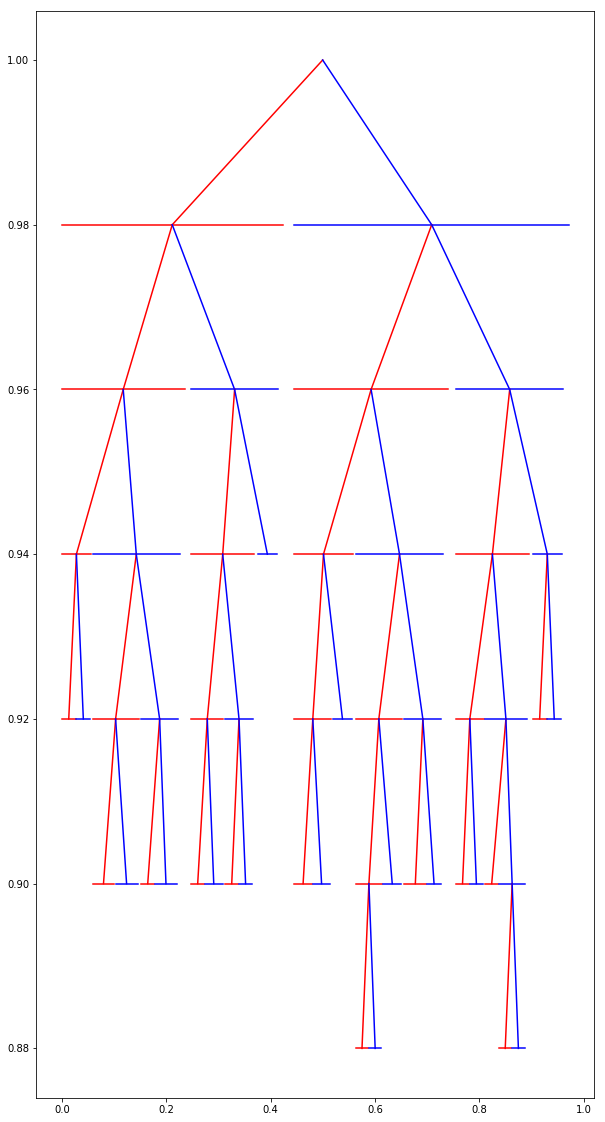

In [7]:
forest.trees[2].plot()
# print(forest.trees[0].root.features)
# print(forest.truth_dictionary.feature_dictionary)

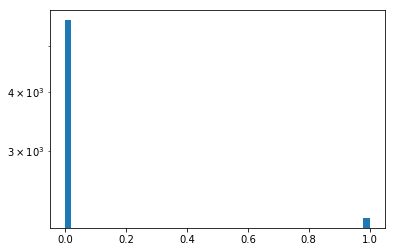

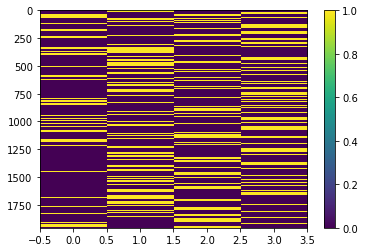

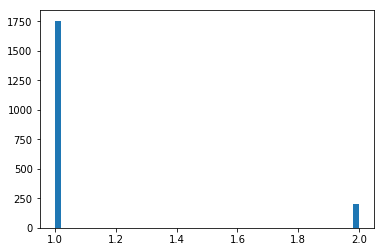

In [8]:
forest.weigh_leaves()
weights = forest.feature_weight_matrix(leaves)
plt.figure()
plt.imshow(weights,aspect='auto')
plt.colorbar()
plt.show()
plt.figure()
plt.hist(np.sum(weights,axis=1),bins=50)
plt.show()

In [9]:
forest_predictions = forest.predict_matrix(iris_test)

(11, 4)
[[4.95833333 3.32500211 1.48484848 0.21      ]
 [4.62692308 3.02763864 1.72195819 0.28636364]
 [6.21000275 2.8764938  4.58395066 1.43279339]
 [5.36250706 2.62835884 3.78525992 1.18288041]
 [4.97678571 2.88125326 2.75966044 0.65923237]
 [5.49049302 2.51833332 3.67967731 1.15623289]
 [5.83094242 2.7146176  4.90144144 1.71724955]
 [6.33053445 2.9359477  5.12816599 1.95182461]
 [6.04563607 2.73708311 4.77944913 1.58131937]
 [6.74165091 3.09857366 5.52337652 2.15572936]
 [6.79779491 3.05296957 5.64532461 2.17242657]]
[[5.  3.4 1.6 0.4]
 [4.5 2.3 1.3 0.3]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.  3.5 1. ]
 [5.6 2.5 3.9 1.1]
 [5.8 2.7 5.1 1.9]
 [6.5 3.2 5.1 2. ]
 [6.  2.2 5.  1.5]
 [6.9 3.2 5.7 2.3]
 [6.8 3.2 5.9 2.3]]


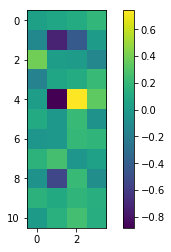

In [10]:
print(forest_predictions.shape)
print(forest_predictions)
print(iris_test)
plt.figure()
plt.imshow(iris_test - forest_predictions)
plt.colorbar()
plt.show()

In [11]:
np.corrcoef(iris_test.flatten(),forest_predictions.flatten())

array([[1.       , 0.9896639],
       [0.9896639, 1.       ]])

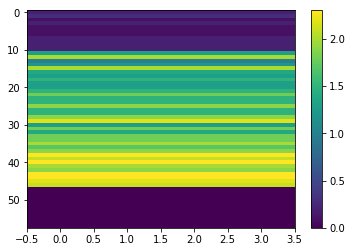

array([[0.2, 0.2, 0.2, 0.2],
       [0.3, 0.3, 0.3, 0.3],
       [0.1, 0.1, 0.1, 0.1],
       [0.2, 0.2, 0.2, 0.2],
       [0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1],
       [0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2],
       [1.3, 1.3, 1.3, 1.3],
       [2. , 2. , 2. , 2. ],
       [1. , 1. , 1. , 1. ],
       [1.2, 1.2, 1.2, 1.2],
       [2. , 2. , 2. , 2. ],
       [1.4, 1.4, 1.4, 1.4],
       [1.3, 1.3, 1.3, 1.3],
       [1.5, 1.5, 1.5, 1.5],
       [1.3, 1.3, 1.3, 1.3],
       [1.3, 1.3, 1.3, 1.3],
       [1.5, 1.5, 1.5, 1.5],
       [1.8, 1.8, 1.8, 1.8],
       [1.5, 1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5, 1.5],
       [1.9, 1.9, 1.9, 1.9],
       [1.5, 1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5, 1.5],
       [1.9, 1.9, 1.9, 1.9],
       [2.2, 2.2, 2.2, 2.2],
       [1.3, 1.3, 1.3, 1.3],
       [1.8, 1.8, 1.8, 1.8],
       [1.4, 1.4, 1.4, 1.4],
       [1.8, 1.8, 1.8, 1.8],
       [1.8, 1

In [12]:
forest.trees[1].plot_leaf_counts()